<a href="https://colab.research.google.com/github/mhtfc/Shopolis-Regional-Sales-Analysis/blob/main/Shopolis_Regional_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name** - SHOPOLIS Sales Analysis

**Project Summary**
This EDA notebook dives into Shopolis 2014-2018 sales dataset through:

Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

Univariate & Bivariate Analysis: Explored distributions(revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring suges and dips.

Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.


**Problem Statement**

Shopolis 2014-2018 sales data to identify key revenue and profit drivers across product, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.


**Objective**

Deliver actionable insights from shopolis 2014-2018 sales data to:

Identify top-performing products,channels, and regions driving revenue and profit

Uncover seasonal trends and anomalies for optimized planning

Spot pricing and margine risks from outlier transactions

Inform pricing, promotion and market-expansion strategies

SETUP AND CONFIGURATION

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name=None)

In [ ]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape: ",(df_state_reg.shape))
print("df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


#### **Data cleaning and wrangling**

In [ ]:
## Merge with customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
    )

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
# Merge with Products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
# Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
df.to_csv('file.csv')

In [ ]:
#Customer Index
#Index
#id
#State Code

#clean up redundant columns
cols_to_drop = ['Customer Index', 'index', 'id', 'State code']
df = df.drop(columns = cols_to_drop, errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
#convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'index',
       'product name', 'name', 'county', 'state_code', 'state', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone'],
      dtype=object)

In [ ]:
#KEEP THE IMPORTANT COLUMNS AND DELETE THE COLUMNS THAT WE DON'T NEED

cols_to_keep = [
    'ordernumber',
    'order date',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budget',
]

In [ ]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Rename the columns
df = df.rename(columns={
    'ordernumber' : 'order_number',
    'orderdate' : 'order_date',
    'customernames' : 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total_unit_cost' : 'cost',
    'state_code' : 'state_code',
    'state' : 'state_name',
    'latitude' : 'lat',
    'longitude' : 'lon',
    '2017 budgets': 'budget'
})

In [ ]:
df.head(1)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,type,lat,lon,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York


In [ ]:
# Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

#Line total is revenue
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,<NA>
1,2014-01-01,Product 20,25868.7,<NA>
2,2014-01-01,Product 26,5869.2,<NA>
3,2014-01-01,Product 7,16368.1,<NA>
4,2014-01-01,Product 8,18331.2,<NA>


In [ ]:
#line total is revenue
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,<NA>
64100,2018-02-28,Product 21,5185.8,<NA>
64101,2018-02-28,Product 13,43483.0,<NA>
64102,2018-02-28,Product 20,27717.9,<NA>
64103,2018-02-28,Product 15,7986.4,<NA>


#Feature Engineering

In [ ]:
df.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,lat,lon,area_code,population,households,median_income,land_area,water_area,time_zone,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,<NA>
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,<NA>
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,<NA>
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,<NA>
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,<NA>


In [ ]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit']/df['revenue']*100

In [ ]:
df.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,population,households,median_income,land_area,water_area,time_zone,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,<NA>,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,<NA>,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,<NA>,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,<NA>,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,<NA>,10082.160,8249.040,45.0


Exploratory Analysis
1. Monthly Sales Trend Over Time

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to higlight monthly revenue points clearly

/tmp/ipython-input-100-3505776696.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  df['order_month'] = df['order_date'].dt.to_period('m')


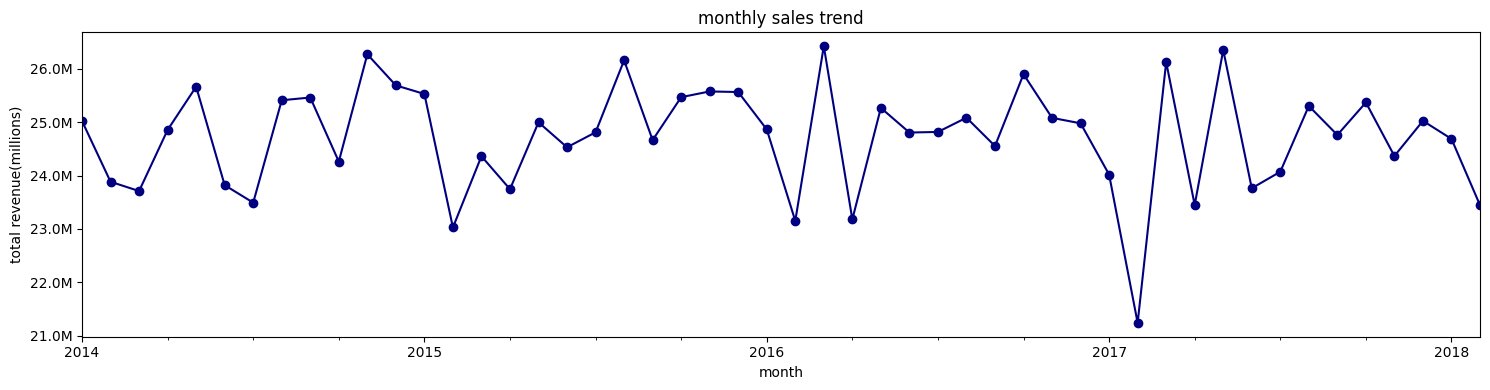

In [ ]:
df['order_month'] = df['order_date'].dt.to_period('m')
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('monthly sales trend')
plt.xlabel('month')
plt.ylabel('total revenue(millions)')

plt.tight_layout()
plt.show()

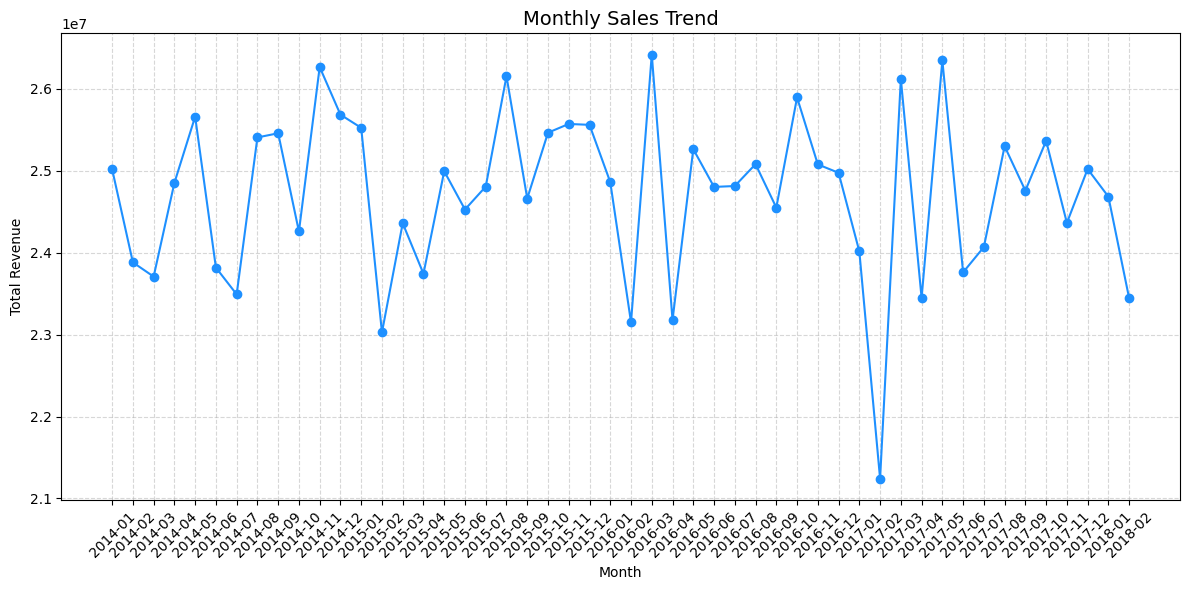

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate revenue if not already present
df['order_quantity'] = pd.to_numeric(df['order_quantity'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['revenue'] = df['order_quantity'] * df['unit_price']

# Create Year-Month column
df['YearMonth'] = df['order_date'].dt.to_period('M').astype(str)

# Group by YearMonth and sum revenue
monthly_sales = df.groupby('YearMonth')['revenue'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['revenue'], marker='o', color='dodgerblue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out Jan and Feb 2018
df = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]


/tmp/ipython-input-103-4252411056.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_seasonality = df.groupby('Month')['revenue'].sum().reset_index()


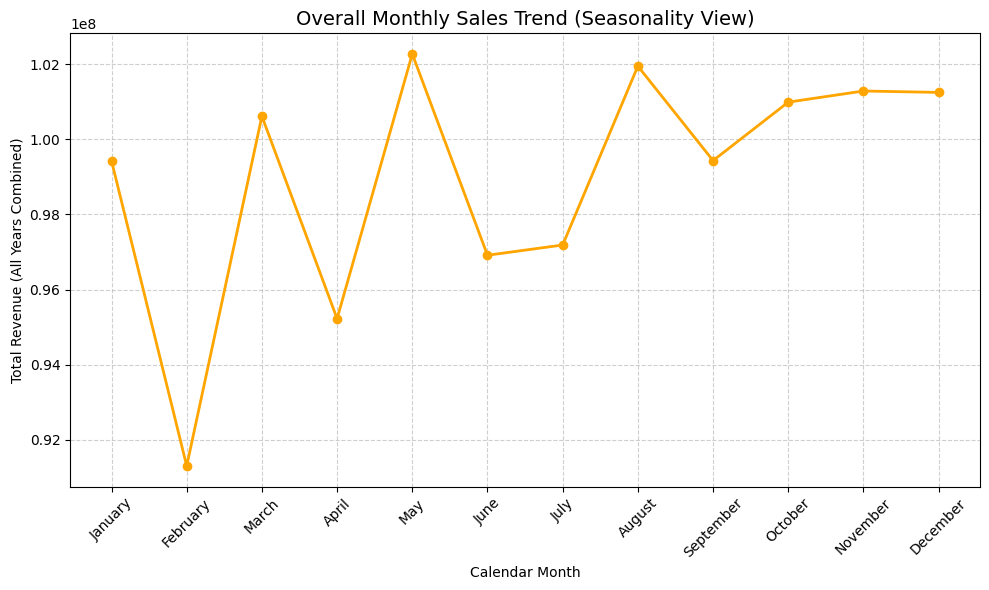

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate revenue if not already present
df['order_quantity'] = pd.to_numeric(df['order_quantity'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['revenue'] = df['order_quantity'] * df['unit_price']

# Extract calendar month name
df['Month'] = df['order_date'].dt.month_name()

# Optional: Define proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by month (across all years) and sum revenue
monthly_seasonality = df.groupby('Month')['revenue'].sum().reset_index()

# Plot seasonality chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonality['Month'], monthly_seasonality['revenue'], marker='o', color='orange', linewidth=2)
plt.title('Overall Monthly Sales Trend (Seasonality View)', fontsize=14)
plt.xlabel('Calendar Month')
plt.ylabel('Total Revenue (All Years Combined)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('final.csv')

/tmp/ipython-input-105-2255136668.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


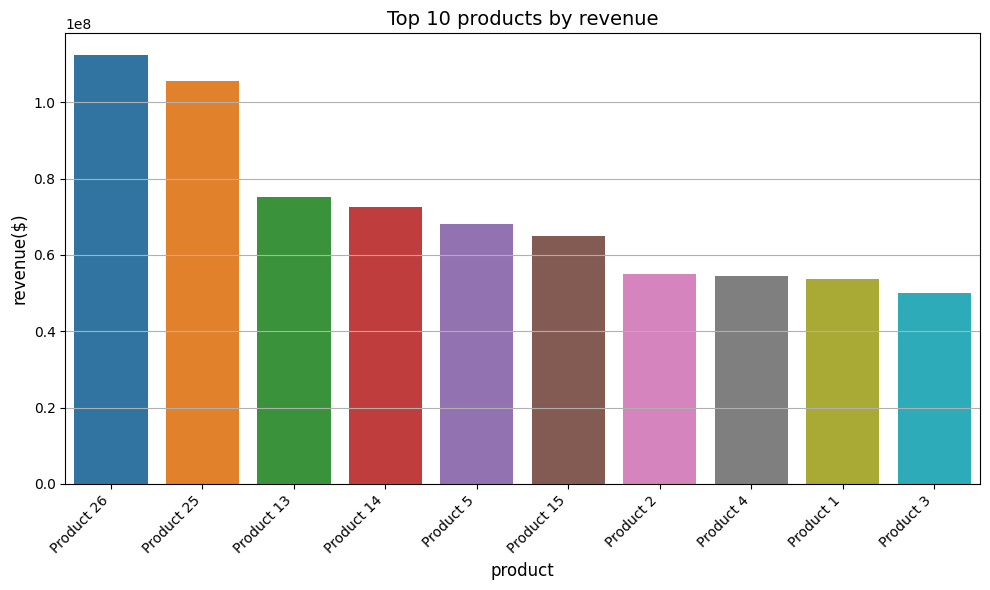

In [ ]:
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

#get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

#Create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')
plt.title('Top 10 products by revenue', fontsize=14)
plt.xlabel('product', fontsize=12)
plt.ylabel('revenue($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

#show the plot
plt.show()

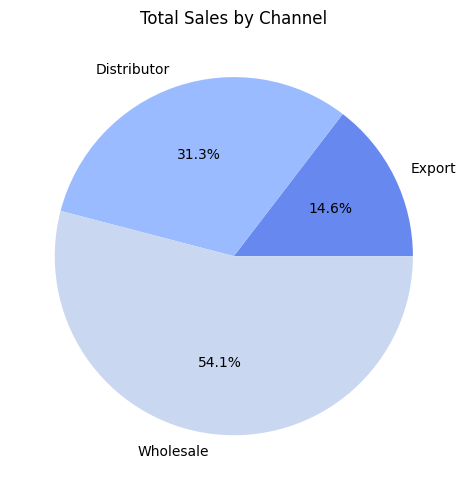

In [ ]:
## Sales by Channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

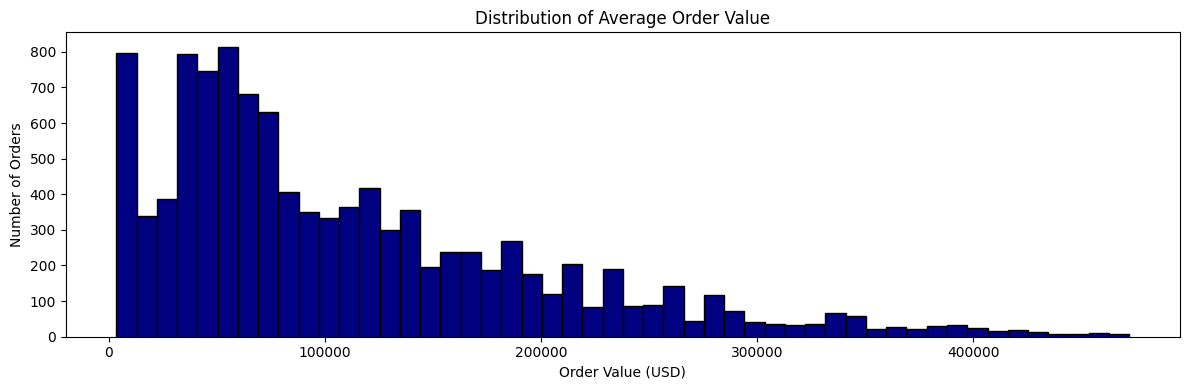

In [ ]:
## Average Order Value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))

plt.hist(
    aov,
    bins=50,
    color='navy',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()


In [ ]:
# Unit Price Distribution per Product
# Top 10 States by Revenue and Order Count
# Average Profit Marging by Channel
# Top and Bottom 10 Customers by Revenue
# Customer Segmentation: Revenue vs Profit Margine
# Correlation Heatmap


/tmp/ipython-input-110-609358247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='product_name', y='unit_price', palette='tab10')


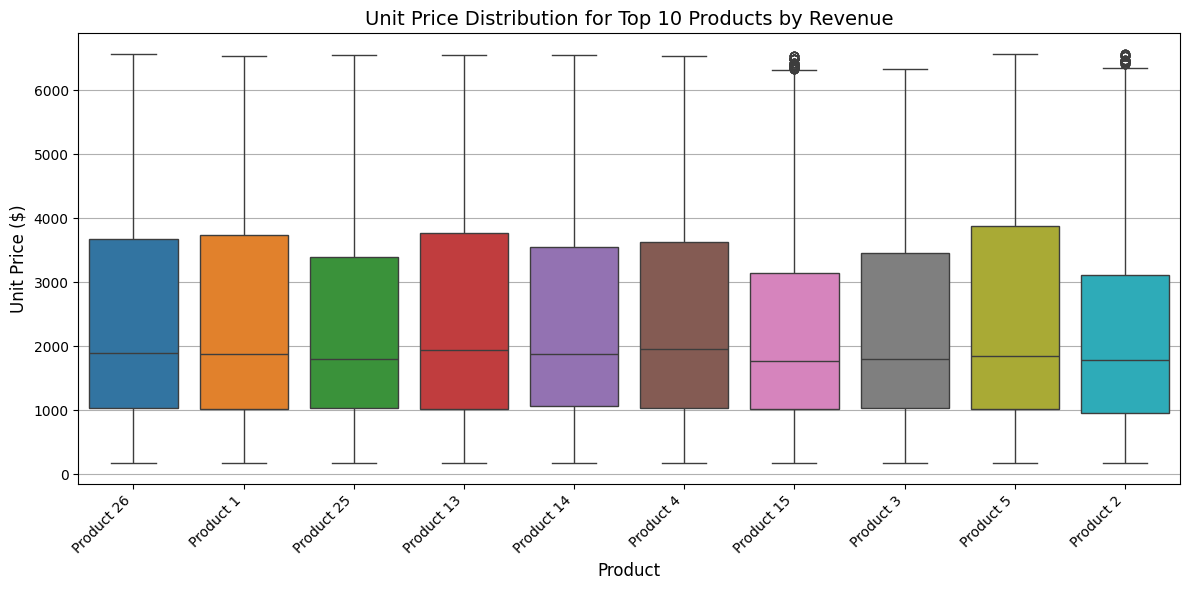

In [ ]:
# Group by product and get revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter original dataframe for top 10 products only
df_top = df[df['product_name'].isin(top_10_products)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipython-input-111-145703323.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(data=top_10_states, x='state_name', y='revenue', palette='tab10', ax=ax1)
/tmp/ipython-input-111-145703323.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(data=top_10_states_orders, x='state_name', y='order_count', palette='tab10', ax=ax2)


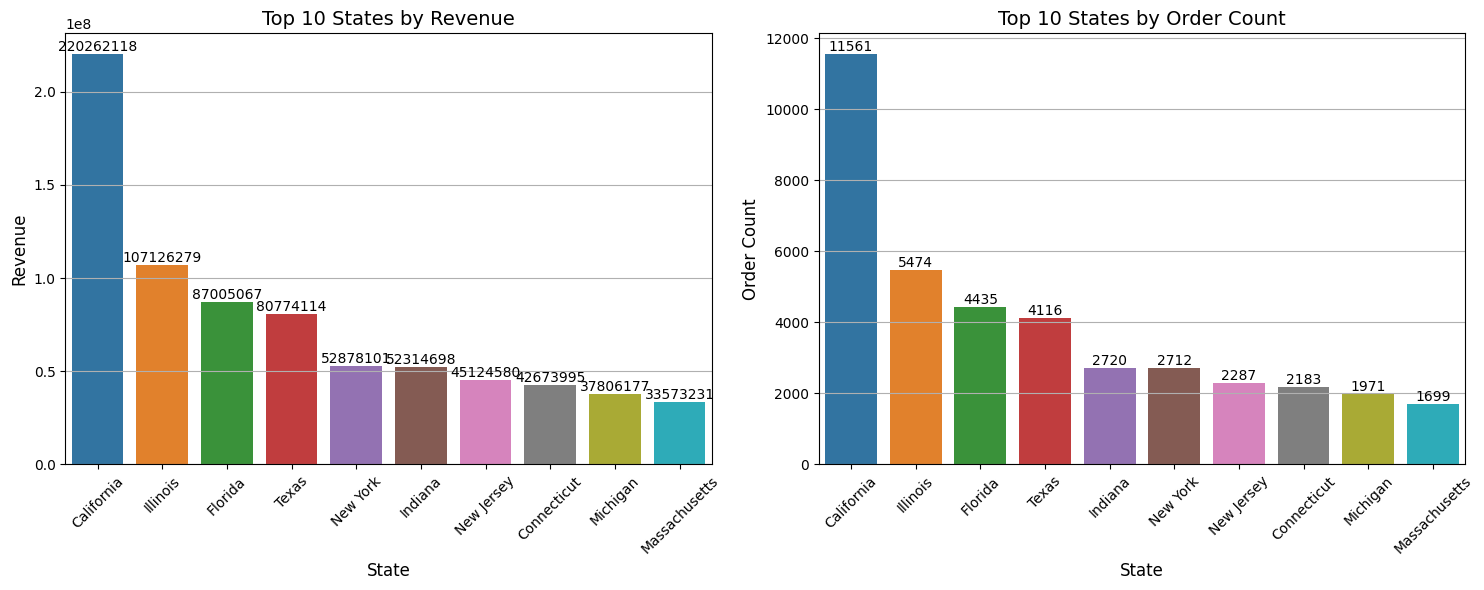

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and aggregate revenue and order count
state_stats = df.groupby('state_name').agg(
    revenue=('revenue','sum'),
    order_count=('order_number', 'count')
).reset_index()

# Get top 10 states by revenue and order count
top_10_states = state_stats.sort_values(by='revenue', ascending=False).head(10)
top_10_states_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Bar chart for top 10 states by revenue
barplot1 = sns.barplot(data=top_10_states, x='state_name', y='revenue', palette='tab10', ax=ax1)
for p in barplot1.patches:
    barplot1.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black')

ax1.set_title('Top 10 States by Revenue', fontsize=14)
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='y')

# Bar chart for top 10 states by order count
barplot2 = sns.barplot(data=top_10_states_orders, x='state_name', y='order_count', palette='tab10', ax=ax2)
for p in barplot2.patches:
    barplot2.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black')

ax2.set_title('Top 10 States by Order Count', fontsize=14)
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, axis='y')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipython-input-112-500527249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


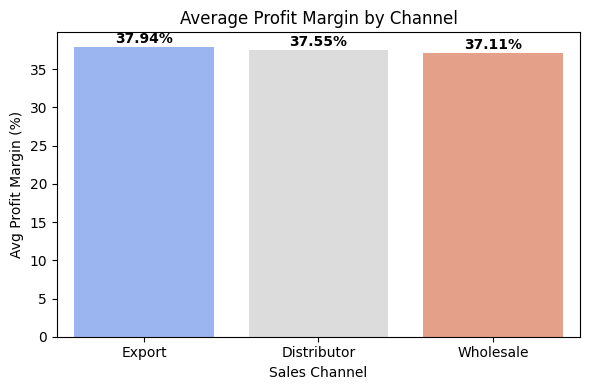

In [ ]:
# Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']     # Group by sales channel
      .mean()                                      # Calculate mean profit margin %
      .sort_values(ascending=False)                # Sort channels from highest to lowest margin
)

# Set the figure size for clarity
plt.figure(figsize=(6, 4))

# Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,                        # x-axis: channel names
    y=channel_margin.values,                       # y-axis: average profit margin values
    palette='coolwarm'                             # Colour palette for bars
)

# Add chart title and axis labels
plt.title('Average Profit Margin by Channel')      # Main title
plt.xlabel('Sales Channel')                        # x-axis label
plt.ylabel('Avg Profit Margin (%)')                # y-axis label

# Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i, v + 0.5,                                # X, Y position for annotation
        f"{v:.2f}%",                               # Label text
        ha='center', fontweight='bold'            # Style
    )

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['order_number', 'order_date', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'customer names', 'index', 'product_name', 'name',
       'county', 'state_code', 'state_name', 'type', 'lat', 'lon', 'area_code',
       'population', 'households', 'median_income', 'land_area', 'water_area',
       'time_zone', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month', 'YearMonth', 'Month'],
      dtype='object')

/tmp/ipython-input-124-1721373330.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-124-1721373330.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


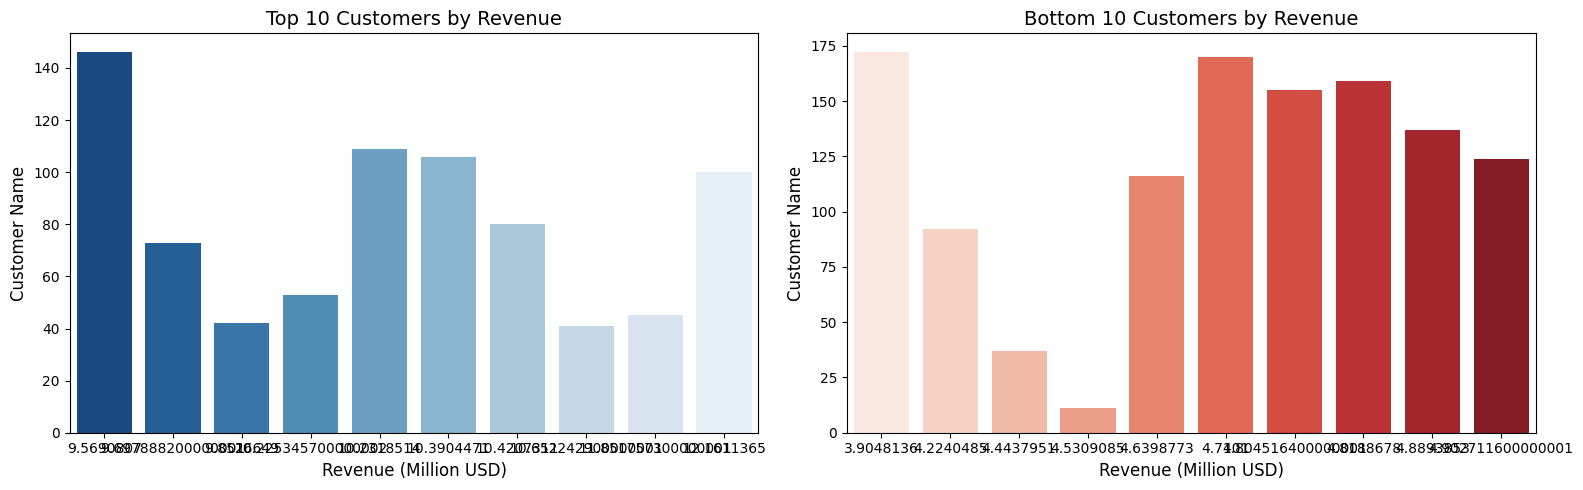

In [ ]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer name index')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer name index')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

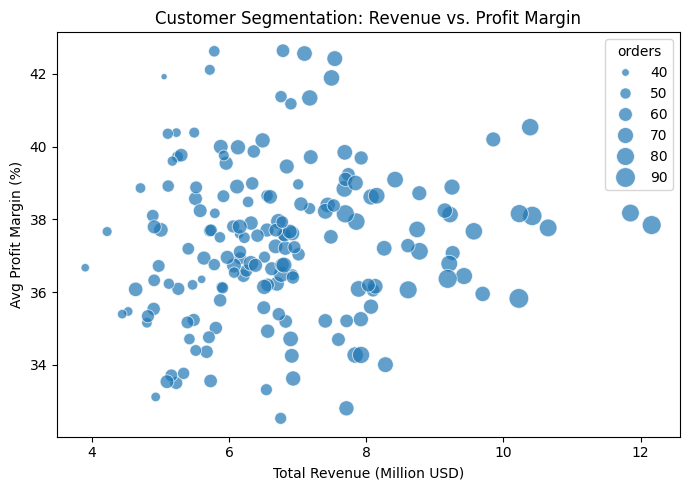

In [ ]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer name index').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


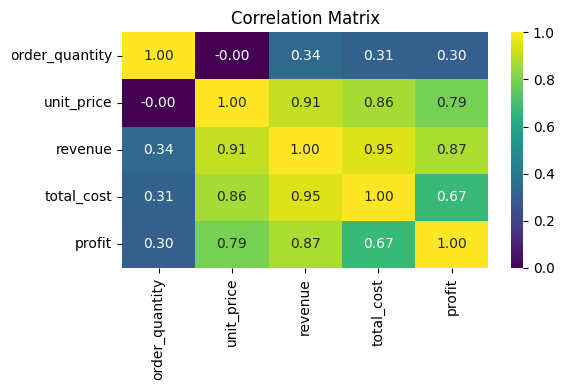

In [ ]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [ ]:
# Channel Distribution: 54% Wholesale, 31% Distribution, 15% Exports
# Monthly Revenue Cycle: May peaks at x$M
Top 10 Products(Revenue):
Bottom 10 Products(Revenue):

RECOMMENDATIONS

1. Outlier Strategy: Exclude or formalize bulk-order and promotional SKUs when calculating averages.

2. Margine Uplift: Apply top-product pricing levers to mid/low tiers; cut costs or underperformers

3. Export Growth: Invest in targeted overseas marketing and distributor partnerships.

4. Seasonal Planning: Shift spend towards January trough and may-june peak; investigate the 2017 anomaly

5. Dashboard Prep: Build aggregated tables for time series, channel mix, and product performance for Power BI